In [1]:
import pickle

with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)


with open('testY.pkl', 'rb') as f:
    testY = pickle.load(f)


with open('le.pkl', 'rb') as f:
    le = pickle.load(f)


In [2]:
from tensorflow import keras

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

2021-09-16 10:28:52.063972: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:

batch_size = 10


In [4]:
def metrics(model, batch_size=40):    
    predIdxs = model.predict(testX, batch_size=batch_size)
    predIdxs = np.argmax(predIdxs, axis=1)
    print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))
    modelLoss, modelAccuracy = model.evaluate(testX, testY)

    print('Test Loss is {}'.format(modelLoss))
    print('Test Accuracy is {}'.format(modelAccuracy ))
    class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
    y_pred = model.predict(testX)
    print(class_names[np.argmax(y_pred[11])])
    x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
    Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

    sns.set(font_scale=1.5, color_codes=True, palette='deep')
    sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title('Confusion Matrix')
    plt.show()

2021-09-16 10:28:53.196196: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-16 10:28:53.196719: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-16 10:28:53.224678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-16 10:28:53.224935: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1060 6GB computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 10 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 178.99GiB/s
2021-09-16 10:28:53.224954: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-16 10:28:53.225882: I tensorflow/stream_executor/platfo

              precision    recall  f1-score   support

    Covid-19    0.91317   0.90180   0.90745       723
Lung Opacity    0.89903   0.85191   0.87484      1202
      Normal    0.89185   0.93428   0.91257      2039
   Pneumonia    0.95492   0.86617   0.90838       269

    accuracy                        0.90102      4233
   macro avg    0.91474   0.88854   0.90081      4233
weighted avg    0.90154   0.90102   0.90072      4233

133/133 [==============================] - 3s 21ms/step - loss: 0.2776 - accuracy: 0.9010
Test Loss is 0.277581125497818
Test Accuracy is 0.9010158181190491
Lung Opacity


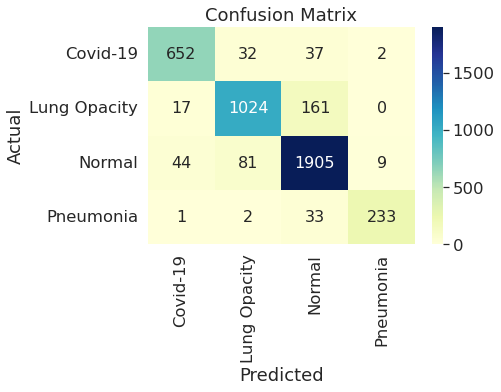

In [5]:
model = keras.models.load_model('CNN_Covid19_Xray_V1.h5')
metrics(model)
# modelRESNET = keras.models.load_model('resnet50_model.h5')
# metrics(modelRESNET)
# modelVGG = keras.models.load_model('vgg16_model.h5')
# metrics(modelVGG)
# modelINC = keras.models.load_model('inc_history_model.h5')
# metrics(modelINC)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 8)       584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 149, 149, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 74, 74, 32)        4

In [7]:
predIdxs = model.predict(testX, batch_size=batch_size)

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import sklearn
from sklearn.preprocessing import label_binarize

In [9]:
fpr, tpr, thresh = roc_curve(testY.argmax(axis=1),predIdxs.argmax(axis=1), pos_label=1)
random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY.argmax(axis=1), random_probs, pos_label=1)

In [10]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']

auc_score = roc_auc_score(testY, predIdxs, multi_class='ovo')
auc_score

0.9823751411970869

In [11]:
fpr = {}
tpr = {}
roc_auc ={}
y = label_binarize(testY, classes=[0, 1, 2,3])
n_classes = y.shape[1]

In [12]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], predIdxs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])    

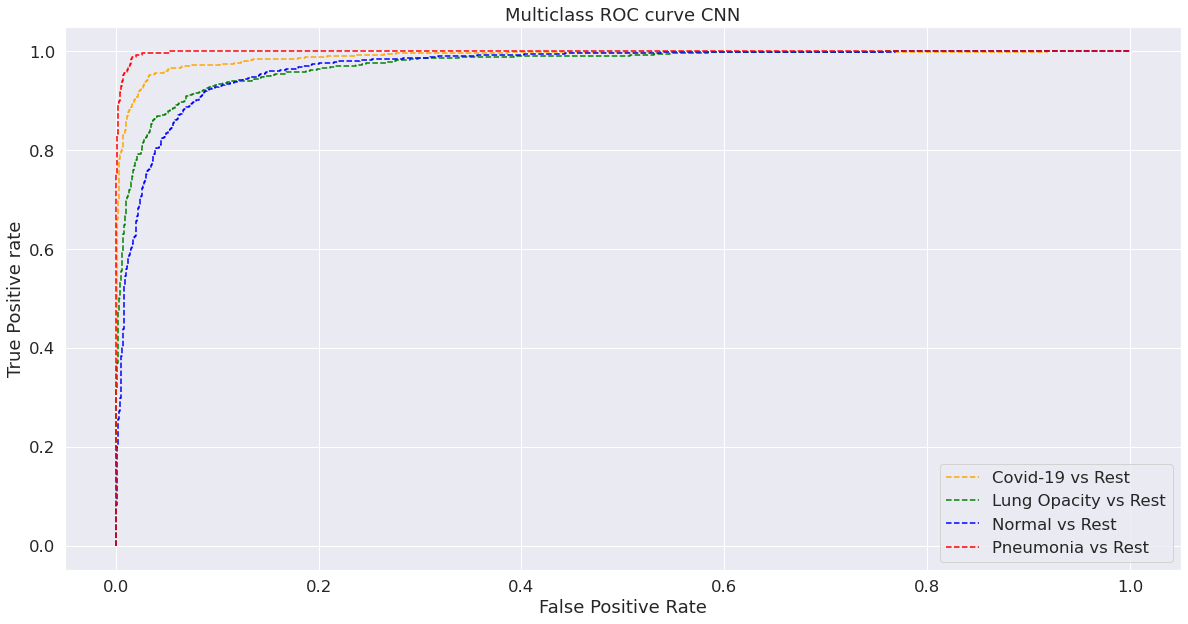

In [13]:
plt.figure(figsize=(20,10))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=le.classes_[0] +' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=le.classes_[1]+ ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=le.classes_[2]+' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=le.classes_[3]+' vs Rest')

plt.title('Multiclass ROC curve CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [14]:
for i in roc_auc.keys():
    print("auc for " + str(le.classes_[i])+ ' = ' + str(roc_auc[i]))

auc for Covid-19 = 0.9895441989494549
auc for Lung Opacity = 0.9727466759184489
auc for Normal = 0.9686576659425613
auc for Pneumonia = 0.9985520239778827


In [15]:
le.classes_

array(['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia'], dtype='<U12')